### 02. Classification

Neural Network classification is process of classify or predict either one or another class.

### 1. Make  classification dataset

In [ ]:
# importing all necessary things

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
from torch import nn

In [ ]:
import sklearn

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (1000, 2)
y shape: (1000,)


In [ ]:
print(f"First 5 X samples:\n{X[:5]}")
print(f"First 5 y samples:\n{y[:5]}")

First 5 X samples:
[[ 0.86239218  0.01253183]
 [-0.53415021 -0.67892392]
 [ 0.87409295 -0.64109708]
 [-0.09501098 -0.94448442]
 [-1.00607172  0.17386973]]
First 5 y samples:
[1 1 0 0 0]


In [ ]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
X.shape

(1000, 2)

In [ ]:
# X[:,1]

In [ ]:
# creating dataset from that values

circles=pd.DataFrame({"x1":X[:,0],
                     "x2":X[:,1],
                     "label":y})
circles.head()

,x1,x2,label
0,0.862392,0.012532,1
1,-0.534150,-0.678924,1
2,0.874093,-0.641097,0
3,-0.095011,-0.944484,0
4,-1.006072,0.173870,0


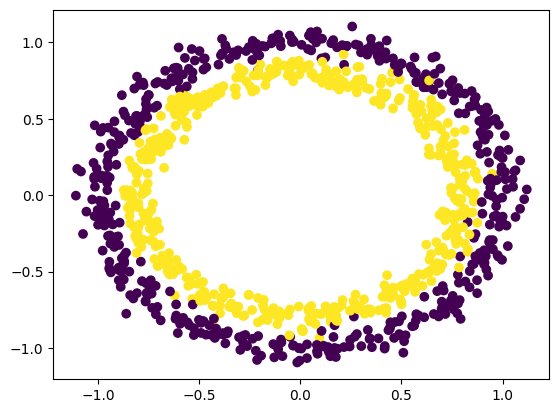

In [ ]:
plt.scatter(circles["x1"],circles["x2"],c=circles["label"])
plt.show()

In [ ]:
  # Note : The dataset we are working is the toy dataset. this is small dataset enough to practice and clear the concept of neural network classification problem,,

In [ ]:
# view the first sameples of features and labels

x_sample=X[0]
y_sample=y[0]

print(f"first sample of x is {x_sample} amd same for y is {y_sample} ")
print(f"shape of x is {x_sample.shape} and shape of y is {y_sample.shape}")

first sample of x is [0.86239218 0.01253183] amd same for y is 1 
shape of x is (2,) and shape of y is ()


### 1.2 Turn data into Tensors and create train test split

In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.8624,  0.0125],
         [-0.5342, -0.6789],
         [ 0.8741, -0.6411],
         [-0.0950, -0.9445],
         [-1.0061,  0.1739]]),
 tensor([1., 1., 0., 0., 0.]))

In [ ]:
X.dtype,y.dtype,type(X),type(y)

(torch.float32, torch.float32, torch.Tensor, torch.Tensor)

In [ ]:
torch.manual_seed(42)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, # 20 % will be test data and 80 % will be training data ..
                                               random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

# 2. Lets build model to classify blue and red dots
 To Do so we want:
 * 1. Setup device witn Gpu acceleration.
 * 2. Loading dataset
 * 3. Construct a model by subclassing (`nn.module`)
 * 4. Define Loss function and optimizer for improving model performance.
 * 5. Create training and testing loop for performance and model evaluation.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train,y_train

(tensor([[ 0.0050, -1.0034],
         [-0.6243, -0.5022],
         [-0.6040,  0.5792],
         ...,
         [ 0.3644,  0.6157],
         [ 0.8743, -0.1809],
         [ 0.4144, -0.7415]]),
 tensor([0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
         0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
         0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
         0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
         0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
         0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
         1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,


Now I have setup device agnostic code, Let's create model

* 1. Subclasses `nn.module` almost all models in pytorch use `nn.module` subclasses.

* 2. create 2 `nn.Linear` layers that capables of handeling shapes of data

* 3. Defines `forward()` method that outlines forward pass or computation of the model

* 4. Instantiate an instance of our model class and send it to target `device`.

In [ ]:
# 1. construct a model that subclasses nn.module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. create nn layers capable of handeling shapes of data
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  # 3. define forward() method that outlines forward pass or computation of the model
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x gpes to layer 1 then goes to layer 2

# 4. Instantiate instance of model class and send it tpo target device
model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Let's write code using sequential  replicating the model.

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.]])

First 10 test labels:
tensor([1., 0., 1., 1., 1., 0., 0., 1., 1., 1.])


For regression Task we use `MSE` or `MAE` and for classification we use `Binary cross entropy` or `categorical cross entropy`

* for some choices of loss functions and optimizers [link text](https://neptune.ai/blog/pytorch-loss-functions)

* for the loss funtion we use `torch.nn.BCEWithLogitsLoss() (it has in built sigmoid function and BCELoss) [link text](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html)

* for different optimizer try `torch.optim`

In [ ]:
# 2. Setup Loss function and optimizer
# nn.Sequential(
#     nn.BCELoss(),
#     nn.sigmoid()
# ) # this is same as BCEWithLogitsLoss ..

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
# calculating accuracy

def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

# 3. Training

For training our model we need to build the training loop for which following steps should be followed

1. Forward pass (forward propagation)
2. calcuate the loss using (loss function)
3. Optimizer zero grad
4. Backward pass (back propagation)
5. Optimizer step (Gradient Descent)

# Training Loop

Forward pass - The model goes through all of the training data once, performing its forward() function calculations (`model(x_train)`).
Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (`loss = loss_fn(y_pred, y_train`).
Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (`optimizer.zero_grad()`).
Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (`loss.backward()`).
Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them `(`optimizer.step()`).

# 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

our model outputs are going to be raw **logits**.
we can convert those raw **logits** into **prediction probabilities** by passing them to activatio0n functions (**softmax activation** for multiclass classification and **sigmoid** for binary classification)

Then those prediction probability can be converted into prediction labels either by rounding off or using `argmax()`

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1254],
        [-0.0120],
        [-0.0432],
        [ 0.1778],
        [-0.0129]])

In [ ]:
# use sigmoid function for convertng into probs
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5313],
        [0.4970],
        [0.4892],
        [0.5443],
        [0.4968]])

Okay, it seems like the outputs now have some kind of consistency (even though they're still random).

They're now in the form of prediction probabilities (I usually refer to these as `y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:

If `y_pred_probs` >= 0.5, y=1 (class 1)
If `y_pred_probs` < 0.5, y=0 (class 0)

To turn our prediction probabilities in prediction labels, we can round the outputs of the sigmoid activation function.

In [ ]:
# find the prediction labels
y_preds=torch.round(y_pred_probs)

# in full (logits -> prediction probabiloty using sigmoid --> then prediction labels)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for same dimension equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 0., 0., 1., 0.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 1., 1.])

# 3.2 Building the training and testing Loop

In [ ]:
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Training model

In [ ]:
# Building training loop
torch.manual_seed(43)

# set number of epochs
epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# build training loop
for epoch in range(epochs):

  ### Training
  model_0.train()

  # 1. forward pass

  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # 2. calculate loss and accuracy

  # loss=loss_fn(torch.sigmoid(y_logits)) # BCELOSS expects pred probs as input..

  loss=loss_fn(y_logits,y_train) # BCEWITHLOGITSLOSS expects raw inputs..

  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  # 2. calcuate the loss fn

  loss_fn = nn.BCEWithLogitsLoss()

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward propagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. forward pass
    test_logits=model_0(X_test).squeeze()
    y_pred=torch.round(torch.sigmoid(test_logits))


    # 2. calculate loss and accuracy
    tests_loss = loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=y_pred)

  # print out all metrices
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {tests_loss:.5f}, Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 0.69703, Accuracy: 52.75% | Test loss: 0.69972, Test acc: 52.00%
Epoch: 100 | Loss: 0.69307, Accuracy: 50.00% | Test loss: 0.69538, Test acc: 44.50%
Epoch: 200 | Loss: 0.69301, Accuracy: 49.12% | Test loss: 0.69475, Test acc: 47.00%
Epoch: 300 | Loss: 0.69301, Accuracy: 49.75% | Test loss: 0.69461, Test acc: 47.50%
Epoch: 400 | Loss: 0.69301, Accuracy: 49.62% | Test loss: 0.69457, Test acc: 47.00%
Epoch: 500 | Loss: 0.69301, Accuracy: 49.50% | Test loss: 0.69455, Test acc: 47.00%
Epoch: 600 | Loss: 0.69301, Accuracy: 49.75% | Test loss: 0.69454, Test acc: 47.00%
Epoch: 700 | Loss: 0.69301, Accuracy: 49.88% | Test loss: 0.69454, Test acc: 47.00%
Epoch: 800 | Loss: 0.69301, Accuracy: 50.00% | Test loss: 0.69453, Test acc: 47.00%
Epoch: 900 | Loss: 0.69301, Accuracy: 50.12% | Test loss: 0.69453, Test acc: 47.00%


# 4. Making predictions and evaluate the model

we can see clearly that test acc is below 50 % which means our model isn't Learning anything,

Let's visualize also make some predictions and make them visual as well !

for doing so we are using `plot_decision_boundary()` --> https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_functions.py already exists, skipping download


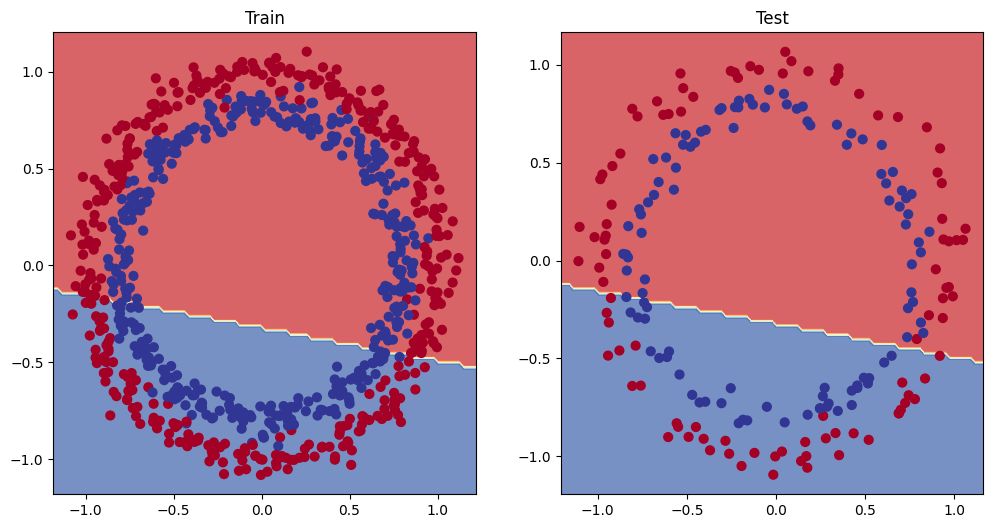

In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Improving the model

 Add more number of layers - which provides model more chances to learn
 Add more hidden units - make 5 hidden units to 10
 fit for longer
 changing the activation function
 Changing the learning rate

 these all are from models perpspective because they are related with models

 Also Data scientists and ml engineer called or change it as `Hyperparameters`

 Let's try and improve the model by
 * Adding more hidden units: 5 --> 10
 * Increase the number of layers: 2 -> 3
 * Increase the number of epochs: 1000 -> 10000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=20)
    self.layer_2=nn.Linear(in_features=20,out_features=20)
    self.layer_3=nn.Linear(in_features=20,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
)

In [ ]:
# creating loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# creating optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.3)

In [ ]:
torch.manual_seed(43)

# set number of epochs
epochs=1000

# put data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# build training loop
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. forward pass
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  # 2.Defining loss and accuracy

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward propagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    # 1. forward pass
    test_logits=model_1(X_test).squeeze()
    y_pred=torch.round(torch.sigmoid(test_logits))

    # 2.Defining loss and accuracy
    loss=loss_fn(test_logits,y_test)
    acc=accuracy_fn(y_true=y_test,y_pred=y_pred)

# print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {loss:.5f}, Test acc: {acc:.2f}%")




Epoch: 0 | Loss: 0.69278, Accuracy: 57.00% | Test loss: 0.69278, Test acc: 57.00%
Epoch: 100 | Loss: 0.69455, Accuracy: 48.00% | Test loss: 0.69455, Test acc: 48.00%
Epoch: 200 | Loss: 0.69453, Accuracy: 47.00% | Test loss: 0.69453, Test acc: 47.00%
Epoch: 300 | Loss: 0.69452, Accuracy: 47.00% | Test loss: 0.69452, Test acc: 47.00%
Epoch: 400 | Loss: 0.69452, Accuracy: 46.50% | Test loss: 0.69452, Test acc: 46.50%
Epoch: 500 | Loss: 0.69452, Accuracy: 46.50% | Test loss: 0.69452, Test acc: 46.50%
Epoch: 600 | Loss: 0.69452, Accuracy: 46.50% | Test loss: 0.69452, Test acc: 46.50%
Epoch: 700 | Loss: 0.69452, Accuracy: 46.50% | Test loss: 0.69452, Test acc: 46.50%
Epoch: 800 | Loss: 0.69452, Accuracy: 46.50% | Test loss: 0.69452, Test acc: 46.50%
Epoch: 900 | Loss: 0.69452, Accuracy: 46.50% | Test loss: 0.69452, Test acc: 46.50%


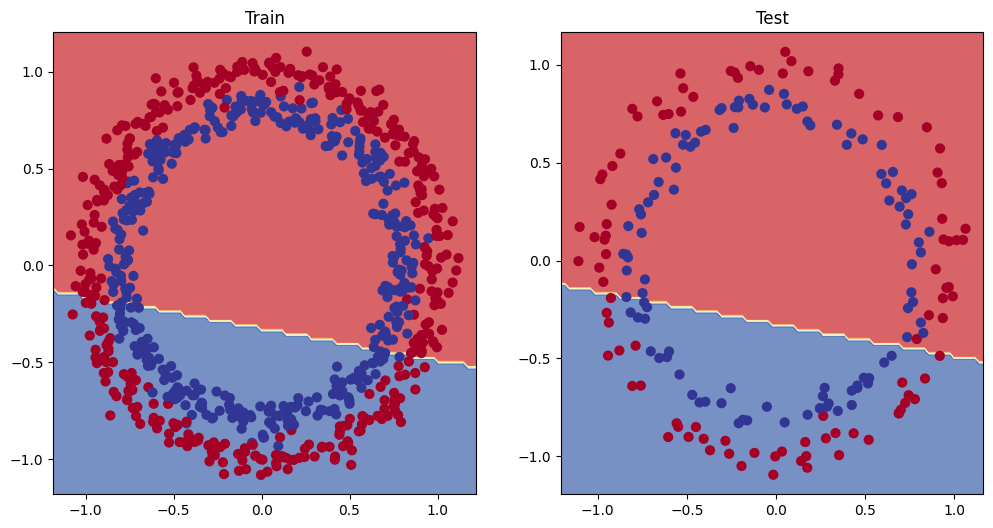

In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

# 5.1 Creating model to see if it fits in straight line

In [ ]:
# create some straight line data
weight=0.7
bias=0.3

start=0
end=1
step=0.01

X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]

In [ ]:
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

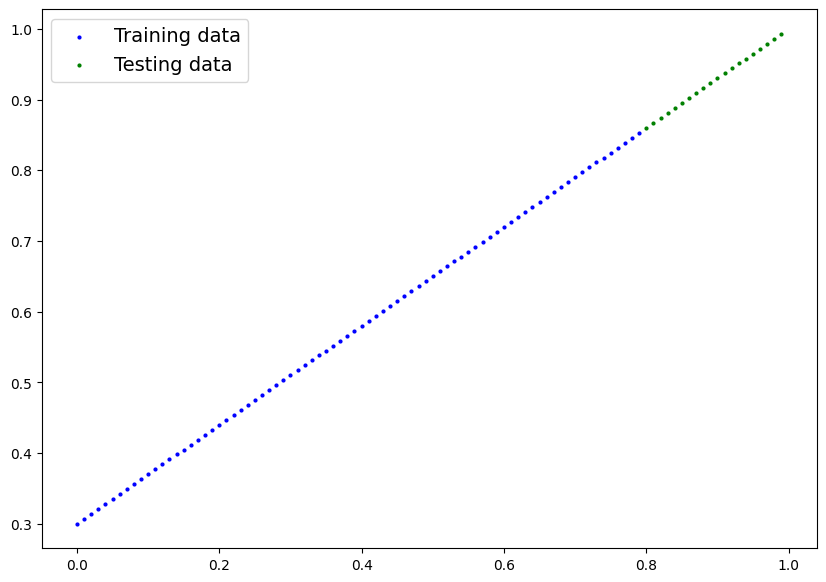

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

# 5.2 Adjusting `model_1` to fit in a straight line

In [ ]:
###
model_2 =nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

epochs=1000

X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):


  # 1. forward pass
  y_pred = model_2(X_train_regression)

  # 2. calculate loss
  loss=loss_fn(y_pred,y_train_regression)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward propagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    y_preds=model_2(X_test_regression)
    test_loss=loss_fn(y_preds,y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.04976, Test loss: 0.12638
Epoch: 100 | Loss: 0.05355, Test loss: 0.12649
Epoch: 200 | Loss: 0.05282, Test loss: 0.12954
Epoch: 300 | Loss: 0.04961, Test loss: 0.12405
Epoch: 400 | Loss: 0.05149, Test loss: 0.12098
Epoch: 500 | Loss: 0.05392, Test loss: 0.12545
Epoch: 600 | Loss: 0.05347, Test loss: 0.12600
Epoch: 700 | Loss: 0.04785, Test loss: 0.12017
Epoch: 800 | Loss: 0.05603, Test loss: 0.11887
Epoch: 900 | Loss: 0.04997, Test loss: 0.11896
